### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/joelk/automated-review-rating-system/data/Kaggle Datasets/Amazon_Unlocked_Mobile.csv")

### Exploring structure of data

In [3]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
df.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0
413839,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,Only downside is that apparently Verizon no lo...,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [6]:
df.shape

(413840, 6)

### The data contains 4 lakh + samples with 6 attributes

In [7]:
df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(64079)

### Dropping rows with null values

In [9]:
df = df.dropna(subset=['Reviews'])
df = df[df['Reviews'].str.strip() != ""] 

### Checking whether if there are duplicated samples

In [10]:
exact_duplicates = df.duplicated(subset=['Reviews', 'Rating'])
print("Number of exact duplicates:", exact_duplicates.sum())

Number of exact duplicates: 249812


### removing exact duplicates

In [11]:
df = df.drop_duplicates(subset=['Reviews', 'Rating'])

In [12]:
df.shape

(163958, 6)

### checking for conflicting reviews

In [13]:
df.groupby('Reviews')['Rating'].nunique()

Reviews
! am very satisfied with this phone. I had the same phone and it broke after years of use and abuse. I liked it so much i wanted another. I was so happy I was able to purchase another in like new condition. Happy, happy!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [14]:
conflicts = df.groupby('Reviews')['Rating'].nunique()
conflicting_reviews = conflicts[conflicts > 1].index
print("Number of reviews with conflicting ratings:", len(conflicting_reviews))


Number of reviews with conflicting ratings: 1189


### removing conflict reviews

In [15]:
df = df[~df['Reviews'].isin(conflicting_reviews)]
df.shape

(161301, 6)

### removing unnecessary columns

In [16]:
df = df.drop(columns=['Review Votes'])

In [17]:
df.shape

(161301, 5)

In [18]:
df.isnull().sum()

Product Name        0
Brand Name      25393
Price            2788
Rating              0
Reviews             0
dtype: int64

##### since i am  only focusing on rating and reviews, im not removing the rows that missing values are persent for 'Brand name' and 'Price'

In [19]:
df['Rating'].value_counts().sort_index()

Rating
1    32862
2    11385
3    14272
4    25327
5    77455
Name: count, dtype: int64

#### From this we can understand the rating samples are highly imbalanced. Rating of 5 have very much more than samples than the others.

### Balancing the dataset

In [20]:
from sklearn.utils import resample

In [27]:
min_count = df['Rating'].value_counts().min()  

balanced_list = []

for rating in range(1, 6):
    subset = df[df['Rating'] == rating]
    
    if len(subset) > min_count:
        subset_balanced = resample(
            subset,
            replace=False,
            n_samples=min_count,
            random_state=42
        )
    else:
        subset_balanced = subset
    
    balanced_list.append(subset_balanced)

df_balanced = pd.concat(balanced_list).reset_index(drop=True)

print(df_balanced['Rating'].value_counts().sort_index())


Rating
1    11385
2    11385
3    11385
4    11385
5    11385
Name: count, dtype: int64


## Visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\joelk\AppData\Local\Temp\ipykernel_17060\859739938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df_balanced, palette='viridis', order=sorted(df_balanced['Rating'].unique()))


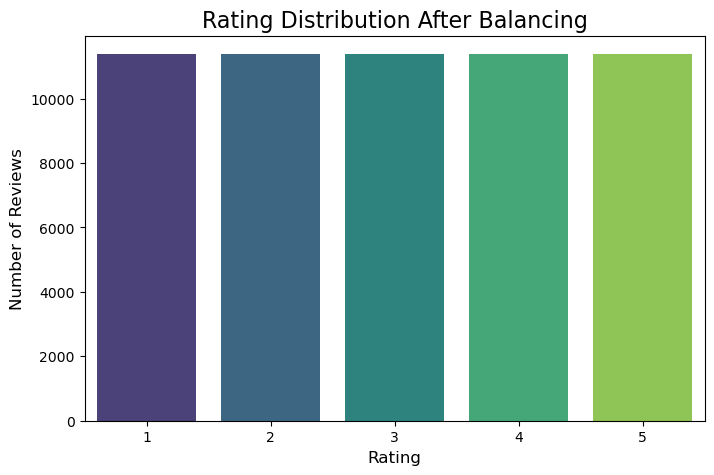

In [23]:
# Plot the rating distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=df_balanced, palette='viridis', order=sorted(df_balanced['Rating'].unique()))
plt.title("Rating Distribution After Balancing", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.show()

C:\Users\joelk\AppData\Local\Temp\ipykernel_17060\2629635736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='review_length', data=df, palette='Set2')


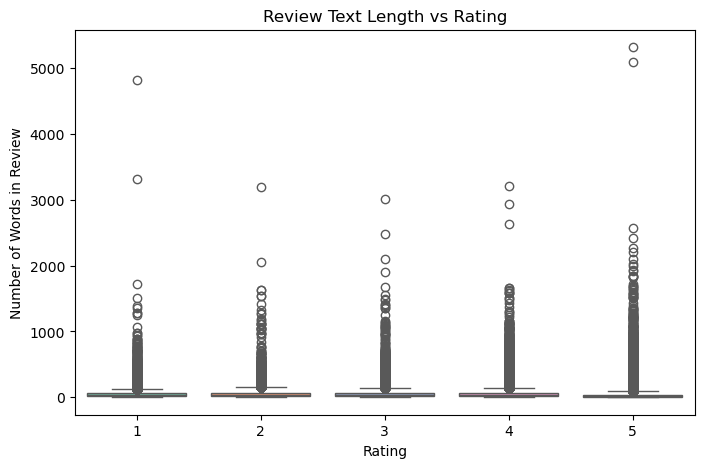

In [24]:
df['review_length'] = df['Reviews'].apply(lambda x: len(str(x).split()))  

plt.figure(figsize=(8,5))
sns.boxplot(x='Rating', y='review_length', data=df, palette='Set2')
plt.title("Review Text Length vs Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Words in Review")
plt.show()


In [25]:
!pip install wordcloud

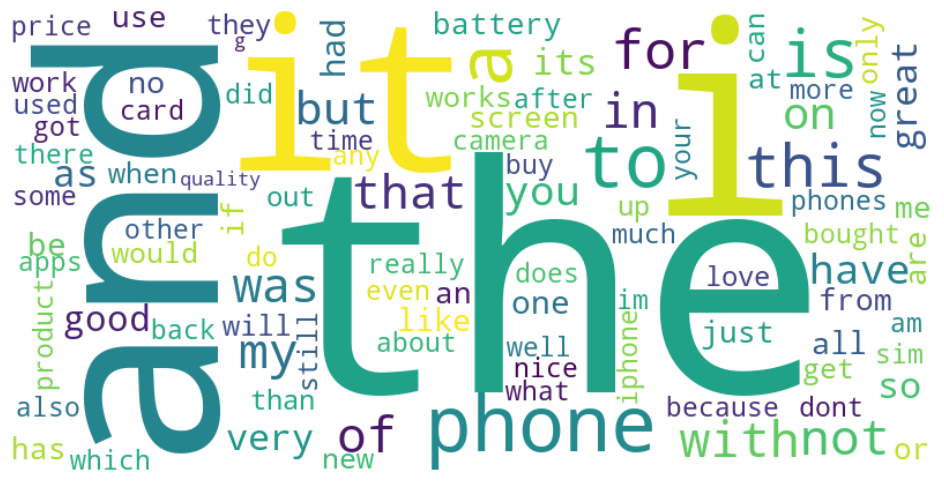

In [26]:
from wordcloud import WordCloud
from collections import Counter
import re

all_text = " ".join(df['Reviews'].astype(str).tolist()).lower()
all_text = re.sub(r'[^a-z\s]', '', all_text)
word_counts = Counter(all_text.split())

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(word_counts)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()